# **What's Bag-of-Words?**
When we work with text data in machine learning, we need to find a way to represent the text as numbers. One way to do this is with ***the bag-of-words*** model, which breaks down the text into individual words and creates a word frequency *vector* of how often each word appears. This tally can then be used as input to a machine learning algorithm.

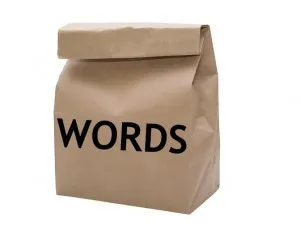

####Example

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
a = "It was the best of times"
b = "It was the worst of times"
c = "It was the age of wisdom"
d = "It was the age of foolishness"
docs =  [a,b,c,d]

In [3]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
# Tokenization => the ultimate goal of tokenization is creating vocabulary
cleaned_docs=[]
for sentence in docs:
    # lowering all the letters bcz we dont want it to treat uppercase and lower case words differently
    sentence = sentence.lower()
    
    # we split our sentence to tokens or words
    tokens = sentence.split() 

    # Removing stop words
    tokens = [i for i in tokens if i not in set(stopwords.words('english'))]          
    tokens = " ".join(tokens)

    cleaned_docs.append(tokens)
    
    
cleaned_docs

['best times', 'worst times', 'age wisdom', 'age foolishness']

In [6]:
# We extract from the corpus of cleaned docs the set of unique tokens after deleting stop words
vocab1 = set(cleaned_docs)
vocab1

{'age foolishness', 'age wisdom', 'best times', 'worst times'}

In [7]:
num_vocab1  = len(vocab1)
vectors = np.zeros((len(vocab1), num_vocab1), dtype=int) #
for i, sentence in enumerate(cleaned_docs):
    for j, word in enumerate(vocab1):
        vectors[i, j] = sentence.count(word)
        
print(vectors)

[[0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]]


####Another Example

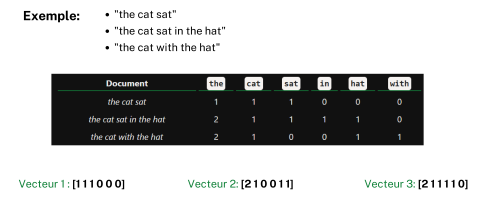

In [8]:
sentences = ['The cat sat', 'The cat sat in the hat', 'The cat with the hat']

In [9]:
#Simple Preprocessing and cleaning for sentences
cleaned_sentences = []
for sentence in sentences:
    tokens = sentence.lower().split()
    cleaned_sentences.append(tokens)

vocab = list(set([word for sentence in cleaned_sentences for word in sentence]))
num_vocab = len(vocab)

In [10]:
# printing our cleaned and tokenized list of sentences
print(cleaned_sentences)

[['the', 'cat', 'sat'], ['the', 'cat', 'sat', 'in', 'the', 'hat'], ['the', 'cat', 'with', 'the', 'hat']]


In [11]:
vocab

['in', 'cat', 'sat', 'hat', 'the', 'with']

In [12]:
# Compute the frequency of each word in the whole sentences
word_freq = {}

for word,sentence in enumerate(cleaned_sentences):
  for word in sentence:
    if word not in word_freq:
            word_freq[word] = 0
    word_freq[word] += 1
    
#Every time we encounter that word again, we will increase the count, 
#leaving 0s everywhere we did not find the word even once

print(word_freq)

{'the': 5, 'cat': 3, 'sat': 2, 'in': 1, 'hat': 2, 'with': 1}


Let's display vector frequency for each sentence as it's showed above:

In [13]:
vectors = np.zeros((len(sentences), num_vocab), dtype=int) 
for i, sentence in enumerate(cleaned_sentences):
    for j, word in enumerate(vocab):
        vectors[i, j] = sentence.count(word)
        
print(vectors)

[[0 1 1 0 1 0]
 [1 1 1 1 2 0]
 [0 1 0 1 2 1]]


Btw those vectors have a dimensionality equal to the size of our vocabulary

In this example, the corpus of sentences contains a list of three documents. The vocab variable is created by iterating through the documents in the corpus and adding all unique words to a set. The set is then sorted to create a vocabulary list. The Bag-of-Words representation of each document is created by iterating through the words in the document and incrementing the corresponding element in the Bag-of-Words vector.

###**CounterVectorizer**



It's a specific implementation of the BOW technique that counts the number of occurrences of each word in a document
in sklearn, it does all the bag-of-words process behind for us

We implement the example above using CounterVectorizer:

In [14]:
# Importing Bag-of-words model
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
# let's create an instance of Counter Vectorizer
cv = CountVectorizer()
Bagofwords = cv.fit_transform(sentences).toarray()

In [16]:
# We print the vocabulary 
sorted(cv.vocabulary_.keys())

['cat', 'hat', 'in', 'sat', 'the', 'with']

In [17]:
print(Bagofwords)

[[1 0 0 1 1 0]
 [1 1 1 1 2 0]
 [1 1 0 0 2 1]]


=> We got the same results uing The CounterVectorizer

In the above example, we only considered single words as features as visible in the vocabulary keys, i.e. it’s a unigram representation, we can use n-gram features depending on our vocabulary, for example:

In [18]:
cv2 = CountVectorizer(ngram_range=(2,2))
cv2.fit_transform(sentences).toarray()

array([[1, 0, 0, 0, 1, 0, 0],
       [1, 0, 1, 1, 1, 1, 0],
       [0, 1, 0, 0, 1, 1, 1]])

To understand the vectors we displayed you need to display the vocabulary:

In [19]:
print(sorted(cv2.vocabulary_.keys()))

['cat sat', 'cat with', 'in the', 'sat in', 'the cat', 'the hat', 'with the']


## **TF-IDF**

**TF-IDF** is capable of integrating the importance of a term, wherein the greater the value, the greater the significance of the term.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
#Creating an instance of TfidVectorizer
tfidf = TfidfVectorizer()

In [22]:
# We transform our data
tr = tfidf.fit_transform(sentences)
tr

<3x6 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

Let's display the score of features and determine which of them are the most important and the useless ones

In [23]:
# We need to create a data frame for the words and sort them by the score
df = pd.DataFrame(tr[0].T.todense(),index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)

In [24]:
df

,TF-IDF
sat,0.673255
cat,0.522842
the,0.522842
hat,0.000000
in,0.000000
with,0.000000


So as we see, TF-IDF score shows that the word 'sat' is the most important feature out there

## **BM25**

We use BM25 to show the relevancy of our searched term with each of documents and we can sort it to index the most relevant ones

In [25]:
!pip install rank_bm25
#a library that offers a collection of algorithms to query a set of documents and return the most relevant to the query

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
from rank_bm25 import BM25Okapi

In [27]:
cleaned_sentences

[['the', 'cat', 'sat'],
 ['the', 'cat', 'sat', 'in', 'the', 'hat'],
 ['the', 'cat', 'with', 'the', 'hat']]

In [28]:
# We create an instance of the BM25 class, the class receives a list of strings which are the document tokens
bm25 = BM25Okapi(cleaned_sentences)
okapi_bm25 = []
for doc in cleaned_sentences:
    scores = bm25.get_scores(doc)
    okapi_bm25.append(scores)
okapi_bm25 = np.array(okapi_bm25)
print("Okapi BM25:")
print(okapi_bm25)

Okapi BM25:
[[-0.57963281 -0.49954159 -0.38356595]
 [-0.77284375 -0.40276752 -0.7671319 ]
 [-0.57963281 -0.71171247 -0.27221434]]


In [29]:
import string
def remove_puncts(input_string, string):
    return input_string.translate(str.maketrans('', '', string.punctuation)).lower()

In [30]:
#the query entered by the user
query = "cat hat sat"
tokenized_query = remove_puncts(query,string).split(" ") #apply tokenization on the query

In [31]:
tokenized_query

['cat', 'hat', 'sat']

In [32]:
doc_scores = bm25.get_scores(tokenized_query)
doc_scores

array([-0.38642187, -0.43105605, -0.31421848])

In [33]:
bm25.get_top_n(tokenized_query,sentences,n=1)

['The cat with the hat']

**Plotting**

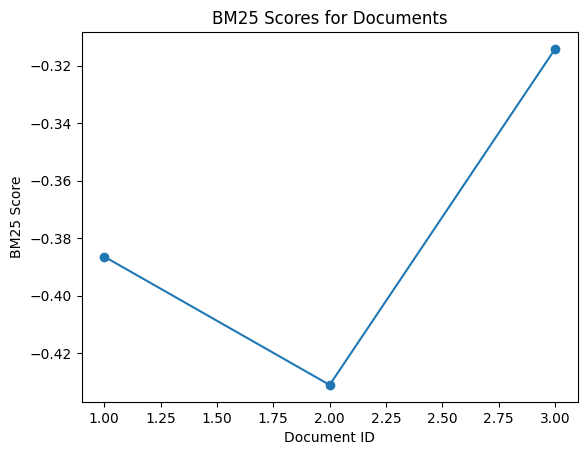

In [36]:
import matplotlib.pyplot as plt

# list of BM25 scores

# list of document IDs
doc_ids = [1, 2, 3]

# plot the BM25 scores
plt.plot(doc_ids, doc_scores, marker='o')

# set the x-axis label
plt.xlabel('Document ID')

# set the y-axis label
plt.ylabel('BM25 Score')

# set the plot title
plt.title('BM25 Scores for Documents')

# show the plot
plt.show()


## **Text-Similarity**

#### Cosine Similarity
used for comparing how similar two vectors are

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

In [38]:
# Cosine similarity
cos_sim = cosine_similarity(okapi_bm25)
print("Cosine similarity:")
print(cos_sim)

Cosine similarity:
[[1.         0.94931571 0.9712483 ]
 [0.94931571 1.         0.84874883]
 [0.9712483  0.84874883 1.        ]]


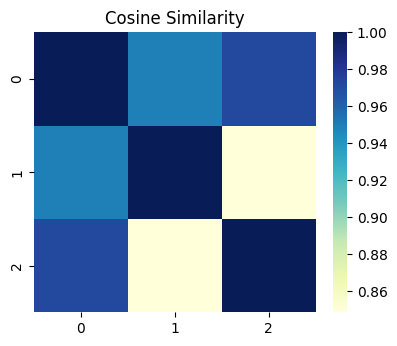

In [39]:
# Set up the figure
plt.figure(figsize=(10, 8))

# Add the heatmaps
plt.subplot(2, 2, 1)
sns.heatmap(cos_sim, cmap="YlGnBu")
plt.title("Cosine Similarity")
plt.show()

the cosine similarity of 1 implies that the two documents are exactly alike. A cosine similarity of 0 would conclude that there are no similarities between the two documents

#### Euclidian Distance

In [41]:
from scipy.spatial.distance import euclidean

# compute the Euclidean distance between the vectors
distance = euclidean(vectors[0],vectors[1])

print('Euclidean distance:', distance)


Euclidean distance: 1.7320508075688772
